# Medical Diagnosis using Deep Learning

In the wake of the COVID-19 pandemic, rapid and accurate diagnosis of respiratory conditions such as **Pneumonia and COVID-19** has become paramount for effective patient management and containment of the virus. Traditional diagnostic methods, while effective, often **require time-consuming laboratory tests** and trained medical personnel. Leveraging advancements in **deep learning** and medical imaging, this project aims to develop a robust and automated system for the detection and classification of pneumonia and COVID-19 from chest X-ray images.





__Objectives:__

1. Develop a deep learning model for pneumonia, COVID-19, and normal chest X-ray classification.
2. Preprocess and augment the dataset to enhance model performance.
3. Implement and optimize a convolutional neural network (CNN) architecture.
4. Evaluate model performance using appropriate metrics.
5. Validate the model's real-world applicability in clinical settings.


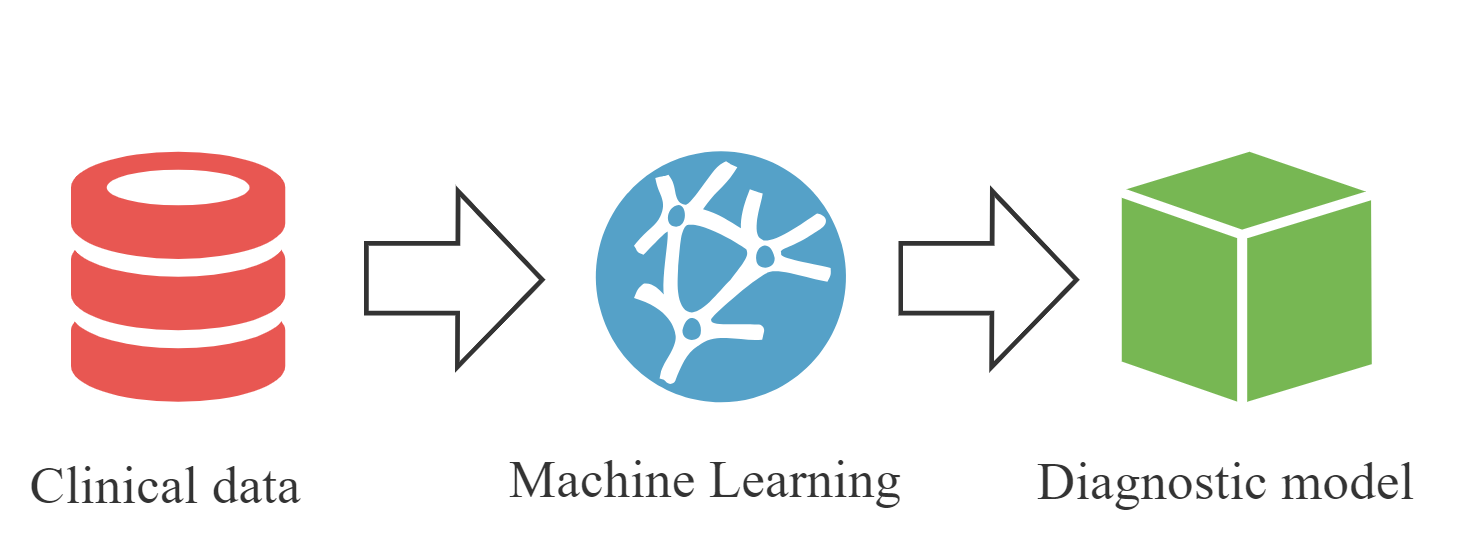

__**ABOUT DATASET**__

**Content**:

It is a medical images directory structure branched into 3 subfolders (COVID, NORMAL, PNEUMONIA) which contains the Chest X-ray (CXR) Images.
COVID: 1626 images
NORMAL: 1802 images
PNEUMONIA: 1800 images

**Context**:

All images are preprocessed and resized to 256x256 in PNG format.


**Inspiration**:

Help the researcher and medical community to detect and classify COVID19 and Pneumonia from Chest X-Ray Images using Deep Learning.


**Acknowledgement & References:**

1. https://www.eurorad.org/ [Eurorad].
2. https://radiopaedia.org/ [Radiopaedia].
3. https://coronacases.org/ [Coronacases].
4. https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia [P. Mooney. (2018). Chest X-Ray Images (Pneumonia), Kaggle].


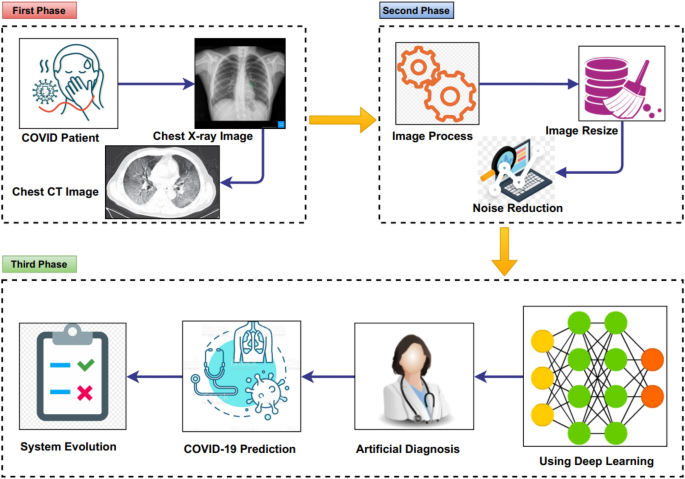

#1. Extracting Image (Data)

In [1]:
# Importing required Libraries

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# Constants

IMAGE_SIZE = 60
BATCH_SIZE = 32

In [3]:
# Extracting fle path from Google drive

data_sets = keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/DataSets/Medical Diagnosis",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32
)
data_sets

Found 5300 files belonging to 3 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 60, 60, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

The image resolution has been reduced from **256x256** to **60x60** due to the system's limited cofigurations.

#2. Exploring and Analyzing Data

In [4]:
# Defining lables

classes = data_sets.class_names
classes

['COVID', 'NORMAL', 'PNEUMONIA']

In [5]:
len(data_sets)

166

In [6]:
166*32

5312

In [8]:
for batch_image, batch_class in data_sets.take(1):
  print("Shape of the image in the first Batch:", batch_image.shape)
  print("Classes of the esch image in the Batch 1:", batch_class.numpy())

Shape of the image in the first Batch: (32, 60, 60, 3)
Classes of the esch image in the Batch 1: [1 2 2 1 2 2 1 2 0 0 1 1 0 2 1 1 1 0 0 1 1 2 1 0 1 0 0 1 0 2 1 2]


0 = 'COVID'

1 = 'NORMAL'

2 = 'PNEUMONIA'

In [74]:
print(f"No. of images in the 1st batch: {len(batch_image)}")
print(f"No. of labels in the 1st batch: {len(batch_class)}")

No. of images in the 1st batch: 32
No. of labels in the 1st batch: 32


In [10]:
print("FIRST IMAGE:")
print()
print(batch_image[0].numpy())

FIRST IMAGE:

[[[ 0.         0.         0.       ]
  [21.310005  21.310005  21.310005 ]
  [40.7       40.7       40.7      ]
  ...
  [52.955498  52.955498  52.955498 ]
  [42.663307  42.663307  42.663307 ]
  [12.497437  12.497437  12.497437 ]]

 [[ 0.         0.         0.       ]
  [ 9.360004   9.360004   9.360004 ]
  [35.916668  35.916668  35.916668 ]
  ...
  [47.8833    47.8833    47.8833   ]
  [36.089993  36.089993  36.089993 ]
  [ 0.5699848  0.5699848  0.5699848]]

 [[ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  [28.86111   28.86111   28.86111  ]
  ...
  [46.249992  46.249992  46.249992 ]
  [30.066639  30.066639  30.066639 ]
  [ 0.         0.         0.       ]]

 ...

 [[ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  ...
  [ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  [ 0.         0.         0.       ]]

 [[ 0.         0.         0.       ]
  [ 0.         0.      

In [11]:
print("FIRST ROW OF THE IMAGE:")
print()
print(batch_image[0][0].numpy())

FIRST ROW OF THE IMAGE:

[[  0.         0.         0.      ]
 [ 21.310005  21.310005  21.310005]
 [ 40.7       40.7       40.7     ]
 [ 62.438896  62.438896  62.438896]
 [ 75.88      75.88      75.88    ]
 [ 82.39333   82.39333   82.39333 ]
 [ 80.600006  80.600006  80.600006]
 [ 81.73333   81.73333   81.73333 ]
 [ 83.66778   83.66778   83.66778 ]
 [113.2      113.2      113.2     ]
 [107.653366 107.653366 107.653366]
 [101.65109  101.65109  101.65109 ]
 [ 78.005554  78.005554  78.005554]
 [ 78.21999   78.21999   78.21999 ]
 [132.19446  132.19446  132.19446 ]
 [161.03224  161.03224  161.03224 ]
 [165.63333  165.63333  165.63333 ]
 [152.22777  152.22777  152.22777 ]
 [147.12445  147.12445  147.12445 ]
 [129.9433   129.9433   129.9433  ]
 [179.6147   179.6147   179.6147  ]
 [199.46231  199.46231  199.46231 ]
 [228.36676  228.36676  228.36676 ]
 [240.83112  240.83112  240.83112 ]
 [199.42084  199.42084  199.42084 ]
 [183.46667  183.46667  183.46667 ]
 [183.1823   183.1823   183.1823  ]
 [1

In [12]:
print("A PIXEL OF THE IMAGE WITH RGB:")
print()
print(batch_image[0][0][2].numpy())

A PIXEL OF THE IMAGE WITH RGB:

[40.7 40.7 40.7]


__VISUALIZING DATA__

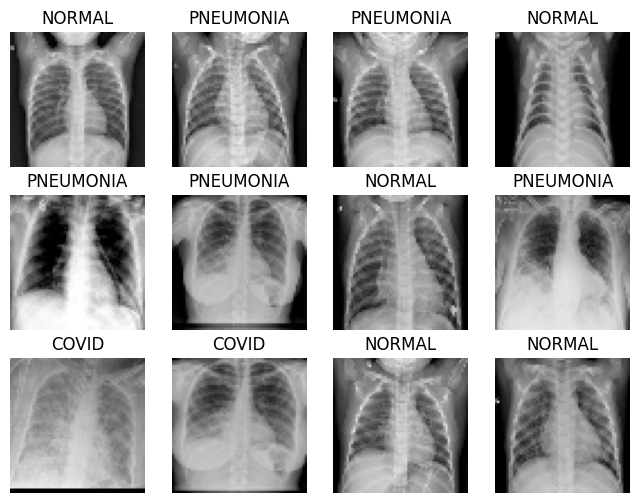

In [13]:
plt.figure(figsize = (8, 6))
for batch_image, lable_batch in data_sets.take(1):
  for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(batch_image[i].numpy().astype('int32'), cmap = 'Oranges')
    plt.title(classes[batch_class[i]])
    plt.axis('off')

It visualizes the first 16 images from the first Batch with its label.

In [14]:
len(data_sets)

166

In [15]:
len(data_sets) * 0.8  # Calculating 80 percent data from the original data.

132.8

In [16]:
len(data_sets) * 0.2  # Calculating 20 percent data from the original data.

33.2

In [17]:
len(data_sets) * 0.1  # Calculating 10 percent data from the original data.

16.6

#3. Dataset Splitting

In [18]:
# Training some samples before get into a Original Data

data_sets = data_sets.take(50)

The batch of the data has been reduced to **50** due to system's low Configurations

In [19]:
print("Approx. images in the sample:", len(data_sets)*32)

Approx. images in the sample: 1600


In [21]:
def data_set_split(ds, train_percent=0.8, test_percent=0.1, val_percent=0.1, shuffle=True, shuffle_size=1000):
  ds_size = len(ds)  # 50

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)
  train_size = int(ds_size*train_percent)  # 40
  valid_size = int(ds_size*val_percent)  #  5

  train_data = ds.take(train_size)
  valid_data = ds.skip(train_size).take(valid_size)
  test_data = ds.skip(train_size).skip(valid_size)

  return train_data, valid_data, test_data

Splitting data into training, validation, and test sets is essential for creating robust **deep learning** models. The training set is used to learn the model parameters, the validation set tunes hyperparameters and prevents overfitting, and the test set evaluates the model's performance on unseen data to ensure generalizability.

In [22]:
train_ds, valid_ds, test_ds = data_set_split(data_sets)

In [23]:
print(len(train_ds))
print(len(valid_ds))
print(len(test_ds))

40
5
5


**Training data** trains the model, **Validation data** tunes it and prevents overfitting, while **Test data** evaluates its performance on unseen data.

__IMPROVING PERFORMANCE USING CACHE AND PREFETCH__

In [24]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
valid_ds = valid_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

Using **cache and prefetch** in data pipelines significantly improves performance by storing processed data for faster reuse (cache) and loading data asynchronously while the model is training (prefetch).

#4. Building a Model

__PREPROCESSING__

In [25]:
resize_image_and_rescale_image = keras.models.Sequential([
    keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    keras.layers.experimental.preprocessing.Rescaling(1./255)
])

In [26]:
resize_image_and_rescale_image

**Resizing** ensures uniformity in image dimensions, aiding in computational efficiency and preventing information loss. **Normalization** standardizes pixel values, improving convergence during training and enhancing model generalization by reducing sensitivity to variations in pixel intensity. Together, they optimize input data consistency and aid CNNs in learning robust features efficiently.

__DATA ARGUMENTATION__

In [27]:
data_argumentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

**Data augmentation** is crucial for enhancing the robustness and generalization of CNN models by artificially increasing the diversity of the training dataset. It helps prevent overfitting by introducing variations such as **rotations, flips, shifts, and zooms** to the images, thereby improving the model's ability to recognize patterns in unseen data

__CNN MODEL__

A **Convolutional Neural Network (CNN)** is a deep learning model specifically designed for processing structured grid data, such as images. It consists of convolutional layers that extract features from input images, **pooling layers that reduce dimensionality**, and fully connected layers for classification. CNNs are widely used in **computer vision** tasks due to their ability to automatically learn hierarchical representations of visual data.

In [28]:
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
cnn = keras.Sequential()

In [29]:
cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE))
cnn.add(keras.layers.MaxPooling2D(pool_size=3, strides=1))

cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(keras.layers.MaxPooling2D((3,3), 1))

cnn.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(keras.layers.MaxPooling2D(3, 1))

cnn.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(keras.layers.MaxPooling2D(3, 1))

cnn.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(keras.layers.MaxPooling2D(3, 1))

cnn.add(keras.layers.Flatten())

Five layers of CNN has beed used.

__ANN MODEL__

In [30]:
cnn.add(keras.layers.Dense(64, activation='relu'))
cnn.add(keras.layers.Dense(3, activation='softmax'))

In [31]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 56, 56, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 54, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 52, 52, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 48, 48, 64)       

This CNN model consists of several convolutional layers followed by max-pooling layers, gradually reducing the image dimensions and increasing depth. It concludes with fully connected layers for classification, with a **total of 13,246,883 trainable parameters**. The final layer produces predictions with three output classes.

__COMPILATION AND TRAINING__

In [32]:
cnn.compile(
    optimizer='adam',
    loss = 'SparseCategoricalCrossentropy',
    metrics=['accuracy']
)

**Early stopping** prevents overfitting by **stopping the training process** when the model's performance on a validation set starts deteriorating, thus avoiding unnecessary computational costs and ensuring optimal generalization.

In [33]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights=True)
history = cnn.fit(
    train_ds,
    validation_data = valid_ds,
    epochs=15,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/15
40/40 [==============================] - 126s 3s/step - loss: 57.4212 - accuracy: 0.4414 - val_loss: 1.2242 - val_accuracy: 0.5813
Epoch 2/15
40/40 [==============================] - 99s 2s/step - loss: 0.6190 - accuracy: 0.7758 - val_loss: 0.6363 - val_accuracy: 0.8062
Epoch 3/15
40/40 [==============================] - 99s 2s/step - loss: 0.3617 - accuracy: 0.8672 - val_loss: 0.3397 - val_accuracy: 0.8687
Epoch 4/15
40/40 [==============================] - 98s 2s/step - loss: 0.2640 - accuracy: 0.9070 - val_loss: 0.2911 - val_accuracy: 0.8750
Epoch 5/15
40/40 [==============================] - 101s 3s/step - loss: 0.2304 - accuracy: 0.9164 - val_loss: 0.3548 - val_accuracy: 0.8750
Epoch 6/15
40/40 [==============================] - 99s 2s/step - loss: 0.3633 - accuracy: 0.8711 - val_loss: 0.3417 - val_accuracy: 0.8562
Epoch 7/15
40/40 [==============================] - 96s 2s/step - loss: 0.2294 - accuracy: 0.9156 - val_loss: 0.1618 - val_accuracy: 0.9500
Epoch 8/15
40/40 

In [34]:
scores = cnn.evaluate(test_ds)

5/5 [==============================] - 9s 427ms/step - loss: 0.1727 - accuracy: 0.9438


 Evaluating the unseen data shows that our **Models's Accuacy** is around **94%**

__ANALYZING LOSSES AND ACCURACY__

In [35]:
len(history.history['loss'])

10

In [36]:
for i in range(len(scores)):
  if i==0:
    print("Loss:", round(scores[i], 2))
  else:
    print("Accuracy:", round(scores[i]*100, 2), '%')

Loss: 0.17
Accuracy: 94.38 %


In [37]:
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 15, 'steps': 40}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [38]:
for i in range(len(history.history['accuracy'])):
  print(round(history.history['accuracy'][i]*100, 2), "%")

44.14 %
77.58 %
86.72 %
90.7 %
91.64 %
87.11 %
91.56 %
95.47 %
95.08 %
96.33 %


In [39]:
# Assigning accuracy and losses in variables

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

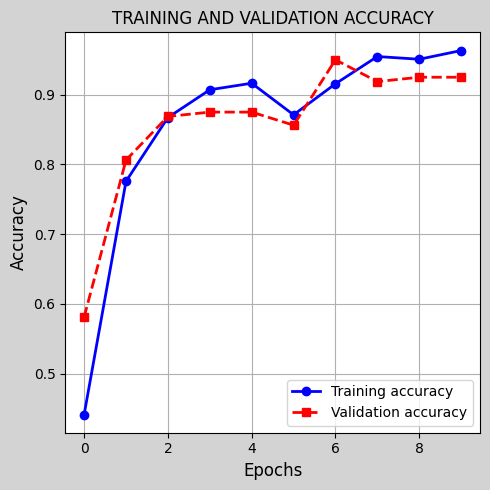

In [42]:
# Plotting Training and validation accuracy

plt.figure(figsize=(5, 5), dpi=100, facecolor='lightgrey', edgecolor='black', tight_layout=True)
plt.plot(range(len(acc)), acc, label='Training accuracy', color='blue', linestyle='-', marker='o', linewidth=2)
plt.plot(range(len(acc)), val_acc, label='Validation accuracy', color='red', linestyle='--', marker='s', linewidth=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("TRAINING AND VALIDATION ACCURACY")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

The above line chart shows a **positive correlation** between the **number of epochs and the accuracy metrics** for both training and validation datasets.
The training process **stops at epoch 8** due to the implementation of the **early stopping** technique.

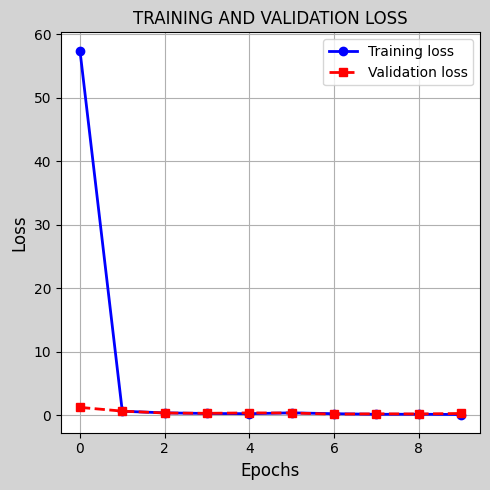

In [43]:
# Plotting Training and validation Loss

plt.figure(figsize=(5, 5), dpi=100, facecolor='lightgrey', edgecolor='black', tight_layout=True)
plt.plot(range(len(acc)), loss, label='Training loss', color='blue', linestyle='-', marker='o', linewidth=2)
plt.plot(range(len(acc)), val_loss, label='Validation loss', color='red', linestyle='--', marker='s', linewidth=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("TRAINING AND VALIDATION LOSS")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

The above line chart shows a **correlation between the number of epochs and the loss for both training and validation datasets**.
After the second epoch, the training loss **dropped suddenly** and then continued to decrease steadily over time.

In [44]:
loss

[57.421180725097656,
 0.6189920902252197,
 0.3616841733455658,
 0.2640071511268616,
 0.23039939999580383,
 0.3633343279361725,
 0.22940964996814728,
 0.13331438601016998,
 0.14445143938064575,
 0.09989529103040695]

#5. Prediction

In [46]:
predicted = cnn.predict(image_batch)
predicted

1/1 [==============================] - 1s 555ms/step


array([[1.22767524e-04, 2.75634341e-02, 9.72313762e-01],
       [1.12362386e-06, 9.63245111e-04, 9.99035537e-01],
       [9.99162853e-01, 4.01084340e-04, 4.36019269e-04],
       [6.70786831e-05, 9.92544055e-01, 7.38889398e-03],
       [6.94380724e-04, 6.59735128e-02, 9.33332086e-01],
       [1.94376800e-04, 9.98310983e-01, 1.49470265e-03],
       [7.07621360e-03, 8.68880376e-02, 9.06035662e-01],
       [2.49858410e-03, 8.02145958e-01, 1.95355520e-01],
       [1.23317353e-03, 5.30232908e-03, 9.93464589e-01],
       [9.96977329e-01, 2.25115288e-03, 7.71447958e-04],
       [3.23802378e-04, 5.69334924e-01, 4.30341274e-01],
       [1.04160375e-04, 9.97921944e-01, 1.97379687e-03],
       [9.73640800e-01, 3.48288123e-03, 2.28762608e-02],
       [2.38613714e-03, 3.81198943e-01, 6.16414905e-01],
       [3.84843105e-07, 9.99887049e-01, 1.12557733e-04],
       [6.57432480e-04, 1.11729100e-01, 8.87613475e-01],
       [2.46476411e-04, 9.97221470e-01, 2.53215898e-03],
       [9.22272265e-01, 7.43895

PNEUMONIA


(-0.5, 59.5, 59.5, -0.5)

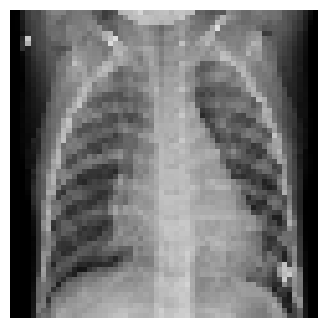

In [69]:
import numpy as np

plt.figure(figsize=(4, 4))
plt.imshow(image_batch[0].numpy().astype('int32'))
print((classes[lable_batch[0].numpy()]))
plt.axis('off')

In [48]:
classes[np.argmax(predicted[0])]

'PNEUMONIA'

The above two code snippets clearly shows the **actual output and predicted output** of a sample Image

In [65]:
def to_predict(img):
  img_array = keras.utils.img_to_array(images[i].numpy())
  img_array = np.expand_dims(img_array, axis=0)

  predictions = cnn.predict(img_array)

  predicted_class = classes[np.argmax(predictions[0])]
  confidence = round(100*np.max(predictions[0]), 2)
  return predicted_class, confidence

__PREDICTING SOME SAMPLE IMAGES__

1/1 [==============================] - 0s 126ms/step


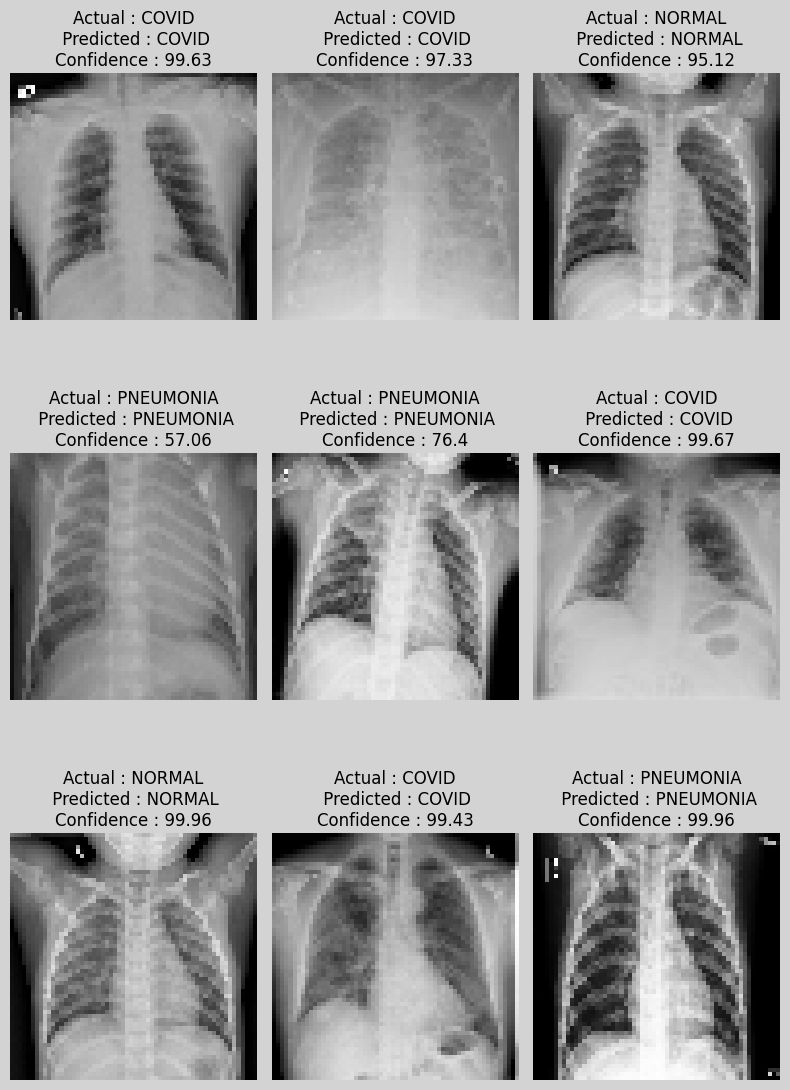

In [71]:
plt.figure(figsize=(8, 12), dpi=100, facecolor='lightgrey', edgecolor='black', tight_layout=True)
for images, labels in test_ds.take(1):
  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('int32'))
    plt.axis("off")
    predicted_class, confidence = to_predict(images[i].numpy())
    actual_class = classes[labels[i]]
    plt.title(f"Actual : {actual_class}\n Predicted : {predicted_class}\nConfidence : {confidence}")
plt.show()

The above picture shows the actual output and Predicted output of few sample images with their **confidence**.

__The developed Deep learning model showcases promising accuracy in diagnosing pneumonia and COVID-19 from chest X-ray images. Its successful implementation signifies a **significant advancement in automated medical diagnostics**, with potential implications for expedited patient care and enhanced healthcare outcomes. **Future research may focus on refining the model's performance** and integrating it into clinical practice for broader societal benefits.__